# 🏀 NBA Team Points Prediction Model
🙋 **authors**: szymond44, gwiazdan  
📆 **date**: 21-07-2025  


In [336]:
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
%matplotlib inline

In [337]:
%load_ext autoreload
%autoreload 2
from data.api_fetcher import ApiFetcher
from utils.distribution import distribution_calculating, check_distribution

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ✨ Introduction

In [338]:
%reload_ext autoreload
api = ApiFetcher(2015, 2025)
df = api.get_numeric_dataframe()

In [339]:
print(api.data.shape[0])

11973


In [340]:
df0 = api.get_df()

-- todo --


## 📈🔗 Correlation and Covariation exploration 

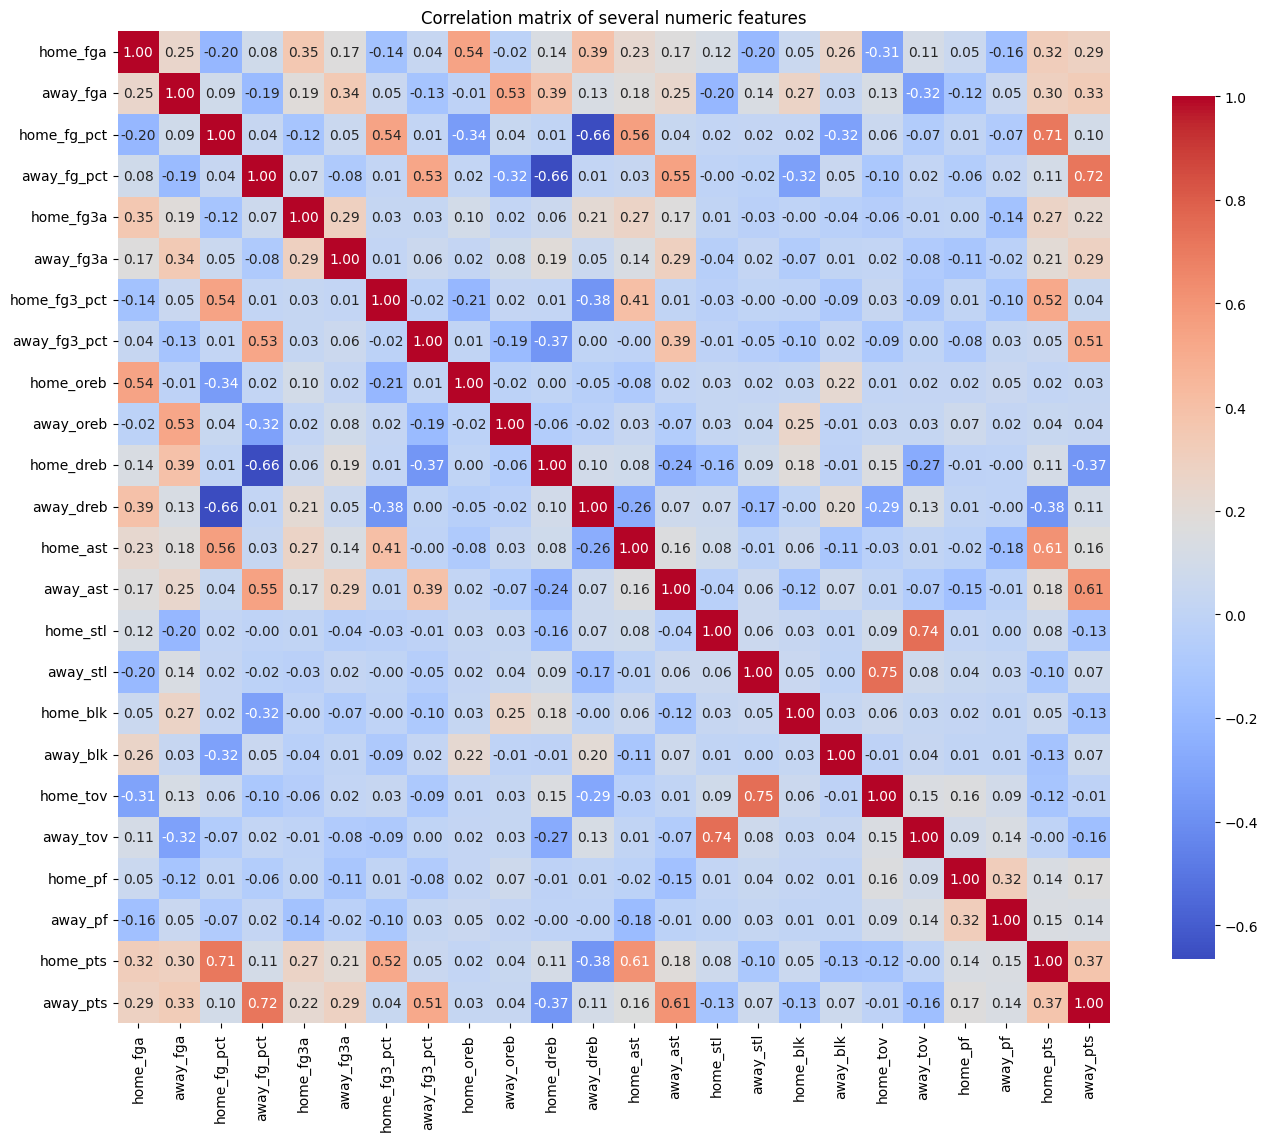

In [341]:
plt.figure(figsize=(16, 16))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .7})
plt.title("Correlation matrix of several numeric features")
plt.show();

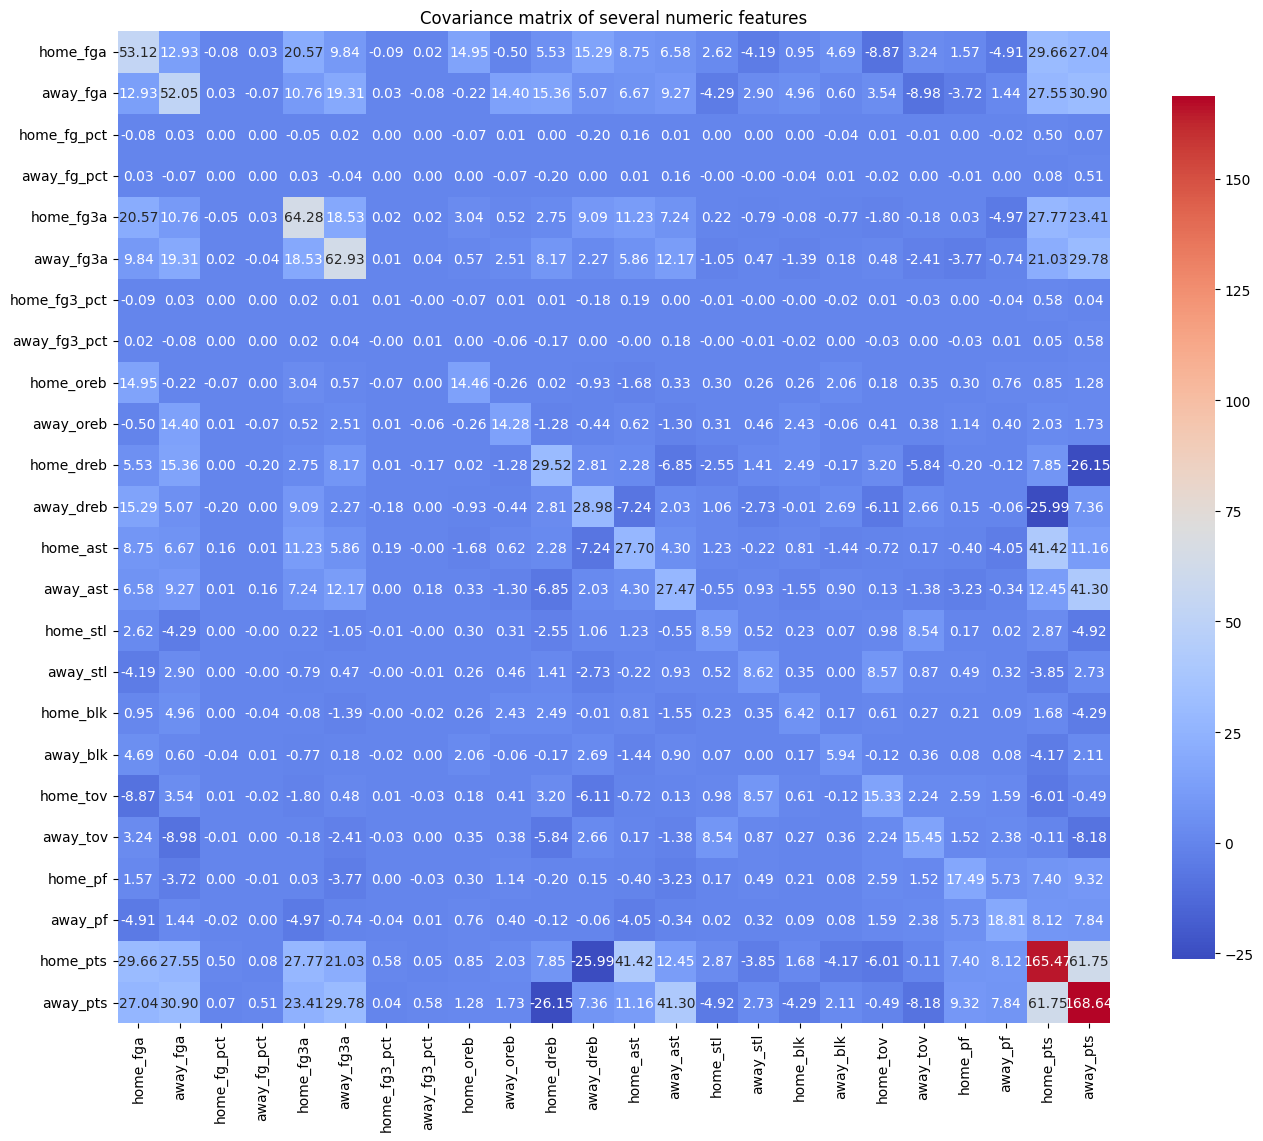

In [342]:
covariance_matrix = df.cov()
plt.figure(figsize=(16, 16))
sns.heatmap(covariance_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .7})
plt.title("Covariance matrix of several numeric features")
plt.show();

# Additional data preparation

In [343]:
teams = sorted(set(df0['home_team']) | set(df0['away_team']))
team_to_idx = {team: idx for idx, team in enumerate(teams)}

def encode_row(row):
    vec = [0] * len(teams)
    vec[team_to_idx[row['home_team']]] = 1
    vec[team_to_idx[row['away_team']]] = -1
    return vec

df0['code'] = df0.apply(encode_row, axis=1) 
print(df0)
print(df0.columns)

       home_fga  away_fga  home_fg_pct  away_fg_pct  home_fg3a  away_fg3a  \
0            82        96        0.451        0.385         27         29   
1            87        94        0.425        0.404         19         29   
2            96        83        0.427        0.422         30         18   
3            86        93        0.349        0.452         18         23   
4            86        93        0.488        0.484         19         15   
...         ...       ...          ...          ...        ...        ...   
11968        74        86        0.514        0.430         35         42   
11969        90        85        0.389        0.376         45         39   
11970        98        89        0.469        0.449         43         42   
11971       104        87        0.500        0.437         40         28   
11972        84        97        0.512        0.474         32         39   

       home_fg3_pct  away_fg3_pct  home_oreb  away_oreb  ...  home_tov  \
0

## Model testing

In [344]:
df = api.df_with_id()
print(df)

       home_fga  away_fga  home_fg_pct  away_fg_pct  home_fg3a  away_fg3a  \
0            82        96        0.451        0.385         27         29   
1            87        94        0.425        0.404         19         29   
2            96        83        0.427        0.422         30         18   
3            86        93        0.349        0.452         18         23   
4            86        93        0.488        0.484         19         15   
...         ...       ...          ...          ...        ...        ...   
11968        74        86        0.514        0.430         35         42   
11969        90        85        0.389        0.376         45         39   
11970        98        89        0.469        0.449         43         42   
11971       104        87        0.500        0.437         40         28   
11972        84        97        0.512        0.474         32         39   

       home_fg3_pct  away_fg3_pct  home_oreb  away_oreb  ...  home_blk  \
0

In [345]:
classical_distribution, home_distribution, away_distribution = distribution_calculating(df, 1)

In [346]:
print(classical_distribution)

{94: 19, 112: 26, 97: 12, 98: 19, 101: 16, 121: 24, 114: 30, 107: 23, 106: 16, 93: 10, 96: 10, 88: 5, 103: 18, 95: 12, 116: 17, 86: 9, 100: 11, 78: 2, 127: 14, 109: 24, 117: 31, 87: 5, 126: 13, 120: 22, 84: 4, 104: 18, 119: 14, 83: 2, 92: 8, 124: 18, 102: 16, 110: 23, 113: 27, 111: 19, 105: 18, 91: 10, 118: 17, 122: 16, 108: 26, 115: 21, 68: 1, 85: 3, 99: 15, 125: 12, 90: 7, 142: 2, 130: 11, 82: 1, 123: 16, 89: 3, 133: 3, 137: 3, 131: 6, 161: 1, 128: 5, 132: 11, 129: 11, 136: 6, 134: 7, 81: 1, 152: 2, 140: 1, 141: 6, 143: 4, 135: 2, 139: 2, 138: 2, 147: 2, 144: 1, 148: 1, 145: 1}


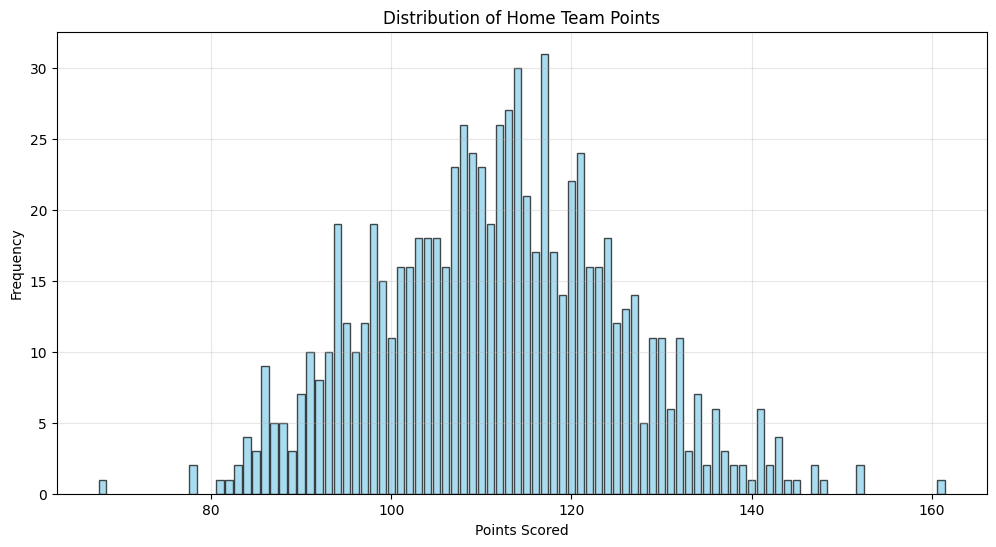

In [347]:
import matplotlib.pyplot as plt
import seaborn as sns

# Przygotuj dane
points = list(classical_distribution.keys())
counts = list(classical_distribution.values())

# Utwórz histogram
plt.figure(figsize=(12, 6))
plt.bar(points, counts, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Points Scored')
plt.ylabel('Frequency')
plt.title('Distribution of Home Team Points')
plt.grid(True, alpha=0.3)
plt.show()

In [348]:
data = api.data
data = data.sort_values(by='date')
print(data)

          game_id        date               home_team             away_team  \
0      0021500001  2015-10-27           Atlanta Hawks       Detroit Pistons   
1      0021500002  2015-10-27           Chicago Bulls   Cleveland Cavaliers   
2      0021500003  2015-10-27   Golden State Warriors  New Orleans Pelicans   
16     0021500016  2015-10-28        Sacramento Kings           LA Clippers   
15     0021500010  2015-10-28         Houston Rockets        Denver Nuggets   
...           ...         ...                     ...                   ...   
11959  0022401192  2025-04-13         Milwaukee Bucks       Detroit Pistons   
11958  0022401199  2025-04-13  Portland Trail Blazers    Los Angeles Lakers   
11971  0022401194  2025-04-13       Memphis Grizzlies      Dallas Mavericks   
11964  0022401190  2025-04-13              Miami Heat    Washington Wizards   
11972  0022401197  2025-04-13       San Antonio Spurs       Toronto Raptors   

      home_season_id  home_team_id home_team_abbrev

In [ ]:
true_count, false_count = check_distribution(df)
print(f"True count: {true_count}, False count: {false_count}")

NameError: name '_is_normal_distribution' is not defined